# Univariate Analysis

##### The types of variables
Broadly speaking, you will encounter two types of variables in your data: 
1. Categorical variables:


- These have values in the form of string or text
- These even include values like dates, sex and so on



2. Numerical variables:


- These have numerical values like age, stock value, and so on
- Basically, any value that you can be measured

#### Categorical Variables
Categorical values can be further divided into two types.
1. Nominal variables


- Simply put, these are values which have no order amongst them, that is no value is greater than the other or can be arranged in any oder with respect to one another.
- For example, sex, weather, country and so on.


2. Ordinal Variables:


- These categorical variables can be arranged in some order with respect to one another
- For example, rank in competition, education level, and so on

#### Numerical Variables
Numberical variables can be further divided into:


1. Continuous Variable


- These have infinite values
- For example, height, weight, age, and so on


2. Discrete Variable


- These have finite values
- For example, the number of gold medals won by an athlete and so on.

##### Dataset Used: Titanic : https://www.kaggle.com/c/titanic

This dataset basically includes infomation regarding all the passengers on Titanic. Various attributes of passengers like age, sex, class, etc. is recorded and final label 'survived' determines whether or the passenger survived or not.

##### Columns
Survived: Outcome of s........

In [ ]:
import pandas as pd
td = pd.read_csv('train.csv',index_col=0)

In [ ]:
td.head()

In [ ]:
td.describe()

In [ ]:
td.columns

## Numerical Variables
1. Age
2. SibSp
3. Parch
4. Pair

In [ ]:
td['Age']

In [ ]:
# It does not make sense to use unique
td['Age'].unique()

In [ ]:
td['Fare']

#### Age and Fare is continuous variable

In [ ]:
td['SibSp'].unique()

In [ ]:
td['Parch'].unique()

#### Parch and SibSp is discrete variables

## Categorical Variables

1. Name
2. Cabin
3. Sex
4. Embarked
5. Survived
6. Pclass

### Nominal Values

In [ ]:
td['Sex'].unique()

In [ ]:
td['Name'].unique()

In [ ]:
td['Cabin'].unique()

In [ ]:
td['Embarked'].unique()

In [ ]:
td['Survived'].unique()

### Ordinal Variable

In [ ]:
td['Pclass'].unique()

### What is Univariate Analysis
- Analysis of a single variable in your data
- A variable can be a column in your dataset (or even a category under which your data falls into)
- We can use various graphs like:


1. Histograms
2. Bar charts
3. Density Plots
4. Distribution plots, and so on

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dummy_age_list = [12,22,36,42,15,89,42,65,29,6,35,81,90,51,53,53,22,31,75,5]
dummy_sex_list = ['Male','Female','Female','Other','Male','Other','Female','Female','Male','Female','Female','Other','Male','Female','Male','Female','Male','Female','Male','Other']
age_sex_df = pd.DataFrame({'Age':dummy_age_list,'Sex':dummy_sex_list})

In [ ]:
age_sex_df

## Histogram

In [ ]:
plt.figure()
age_sex_df['Age'].hist()

## Bar Charts
### You can also use Seaborn library for visualization
link: https://seaborn.pydata.org

In [ ]:
sns.set(style='darkgrid')
ax = sns.countplot(x='Sex',data=age_sex_df)

In [ ]:
maths_marks = [20,18,15,25,17,16]
science_marks = [14,16,20,15,15,12]
english_marks = [20,18,10,15,25,10]
marks_df = pd.DataFrame({'Maths': maths_marks,'Science':science_marks,'English':english_marks})

In [ ]:
marks_df

In [ ]:
marks_df.plot.bar()

In [ ]:
marks_df.plot.density()

## Box Plot

In [ ]:
age_sex_df.boxplot()

In [ ]:
marks_df.boxplot()

# Skewness and Kurtosis
1. What is skewness: 


- Is a measure of asymetry of a distribution
- A measure of how much it differs from a normal distribution
- A normal distribution has skewness of 0
- If skewness is +ve, distribution is skewed to right and tail on left hand side is no longer than the one on right hand side.
- If skewness is -ve, distribution is skewed to left and tail on right hand side is longer than the one on left hand side.
   
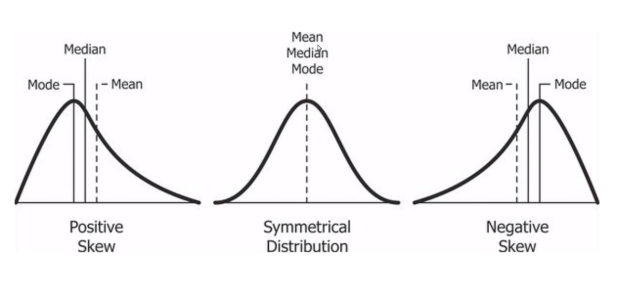
   
2. What is Kurtosis


- It is measure of the degree of tailedness of a distribution
- It can also be though of as a measure of sharpness of a curve with respect to a normal distribution
- It identifies how values are clustered around the central tendency

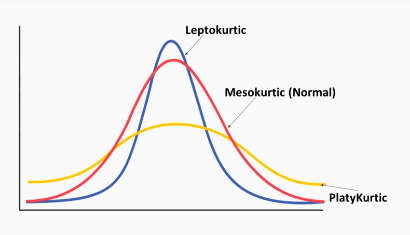

### Univariate Analysis for Olympics Dataset


Data Set: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
athletes_df = pd.read_csv('athlete_events.csv')
regions_df = pd.read_csv('noc_regions.csv')
data_df = pd.merge(athletes_df,regions_df,on='NOC',how='left')

In [ ]:
data_df.head()

In [ ]:
data_df.columns

In [ ]:
data_df.info()

In [ ]:
data_df.describe()

In [ ]:
sns.distplot(data_df['Age'])

In [ ]:
age_df = data_df['Age']
age_df = pd.to_numeric(data_df['Age'],errors='coerce')
age_df = age_df.dropna()
age_df = age_df.astype(int)

In [ ]:
sns.countplot(age_df)

In [ ]:
data_df.loc[data_df['Medal'].isnull()]

In [ ]:
medalists_df = data_df.loc[~data_df['Medal'].isnull()]

In [ ]:
medalists_df

In [ ]:
def plot_column(my_df,col,chart_type='Histogram',dtype=int,bin_size=25):
    temp_df = pd.to_numeric(my_df[col],errors='coerce')
    temp_df = temp_df.dropna()
    temp_df = temp_df.astype(dtype)
    if chart_type == 'Histogram':
        ax = sns.countplot(temp_df)
    elif chart_type =='Density':
        ax = sns.distplot(temp_df)
    xmin,xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin,xmax,bin_size),2))
    plt.tight_layout()
    plt.locator_params(axis='y',nbins=6)
    plt.show()

In [ ]:
plot_column(medalists_df,'Age')

### Calculate Skewness

In [ ]:
from scipy.stats import skew
age_df = pd.to_numeric(medalists_df['Age'],errors='coerce')
age_df = age_df.dropna()
age_df = age_df.astype(int)
print('Skewness is {}'.format(skew(age_df)))
print('Mean is {}'.format(np.mean(age_df)))
print('Median is {}'.format(np.median(age_df)))

In [ ]:
plot_column(medalists_df,'Height',bin_size=15)

In [ ]:
height_df = pd.to_numeric(medalists_df['Height'],errors='coerce')
height_df = height_df.dropna()
height_df = height_df.astype(int)
print('Skewness is {}'.format(skew(height_df)))
print('Mean is {}'.format(np.mean(height_df)))
print('Median is {}'.format(np.median(height_df)))

In [ ]:
plot_column(medalists_df,'Weight',bin_size=15)

In [ ]:
weight_df = pd.to_numeric(medalists_df['Weight'],errors='coerce')
weight_df = weight_df.dropna()
weight_df = weight_df.astype(int)
print('Skewness is {}'.format(skew(weight_df)))
print('Mean is {}'.format(np.mean(weight_df)))
print('Median is {}'.format(np.median(weight_df)))

In [ ]:
sports_df = medalists_df[~medalists_df['Sport'].isnull()]
sns.countplot(medalists_df['Sport'])

In [ ]:
sum(medalists_df['Sport'].isnull())

In [ ]:
sports_count = medalists_df['Sport'].value_counts().nlargest(25).to_frame()

In [ ]:
print(sports_count)

In [ ]:
ax = sports_count.plot.bar(y='Sport')
ax.get_legend().remove()

In [ ]:
year_count_df = data_df['Year'].value_counts().to_frame()

In [ ]:
year_count_df.sort_index(inplace = True)
ax = year_count_df.plot.bar(y='Year')
ax.get_legend().remove()